In [ ]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 45.5 MB/s eta 0:00:00


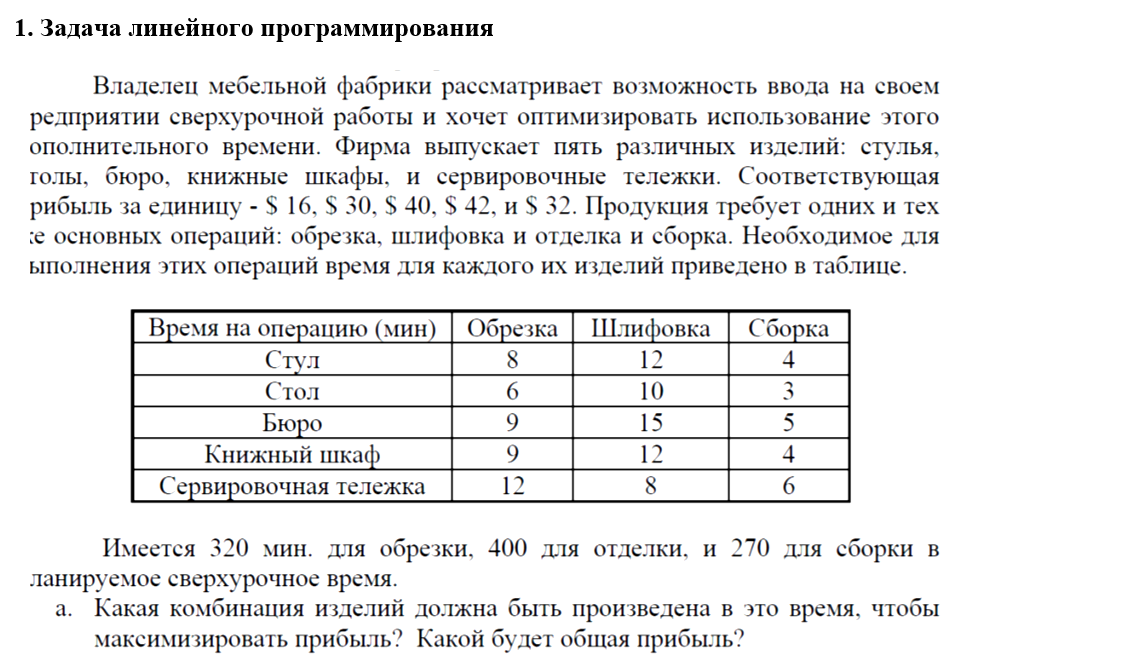

In [ ]:
from pulp import *

# Define the problem as a maximization problem
prob = LpProblem("Furniture Factory", LpMaximize)

# Define the decision variables
chairs = LpVariable("Chairs", 0)
tables = LpVariable("Tables", 0)
bureaus = LpVariable("Bureaus", 0)
bookcases = LpVariable("Bookcases", 0)
carts = LpVariable("Carts", 0)

# Define the objective function
prob += 16*chairs + 30*tables + 40*bureaus + 42*bookcases + 32*carts

# Define the constraints
prob += 8*chairs + 6*tables + 9*bureaus + 9*bookcases + 12*carts <= 320
prob += 12*chairs + 10*tables + 15*bureaus + 12*bookcases + 8*carts <= 400
prob += 4*chairs + 3*tables + 4*bureaus + 4*bookcases + 6*carts <= 270

# Solve the problem
prob.solve()

# Print the results
print("Status:", LpStatus[prob.status])
print("Total Profit: $", value(prob.objective))
for v in prob.variables():
    print(v.name, "=", v.varValue)

Status: Optimal
Total Profit: $ 1413.3333276
Bookcases = 31.111111
Bureaus = 0.0
Carts = 3.3333333
Chairs = 0.0
Tables = 0.0


In [ ]:
from pulp import *

# Create a LP problem
prob = LpProblem("Overtime Production Problem", LpMaximize)

# Define decision variables
x1 = LpVariable("Chairs", lowBound=0, cat='Integer')
x2 = LpVariable("Tables", lowBound=0, cat='Integer')
x3 = LpVariable("Bureaus", lowBound=0, cat='Integer')
x4 = LpVariable("Bookcases", lowBound=0, cat='Integer')
x5 = LpVariable("Serving Carts", lowBound=0, cat='Integer')

# Define objective function
prob += 16*x1 + 30*x2 + 40*x3 + 42*x4 + 32*x5, "Total Profit"

# Define constraints
prob += 8*x1 + 6*x2 + 9*x3 + 9*x4 + 12*x5 <= 320, "Total Trimming Time"
prob += 12*x1 + 10*x2 + 15*x3 + 12*x4 + 8*x5 <= 400, "Total Grinding Time"
prob += 4*x1 + 3*x2 + 4*x3 + 4*x4 + 6*x5 <= 270, "Total Assembly Time"

# Solve the problem
prob.solve()

# Print the status of the problem
print("Status:", LpStatus[prob.status])

# Print the optimal production quantities and total profit
print("Optimal Production Quantities:")
print("Chairs:", int(x1.varValue))
print("Tables:", int(x2.varValue))
print("Bureaus:", int(x3.varValue))
print("Bookcases:", int(x4.varValue))
print("Serving Carts:", int(x5.varValue))
print("Total Profit:", int(value(prob.objective)))

Status: Optimal
Optimal Production Quantities:
Chairs: 0
Tables: 0
Bureaus: 0
Bookcases: 32
Serving Carts: 2
Total Profit: 1408


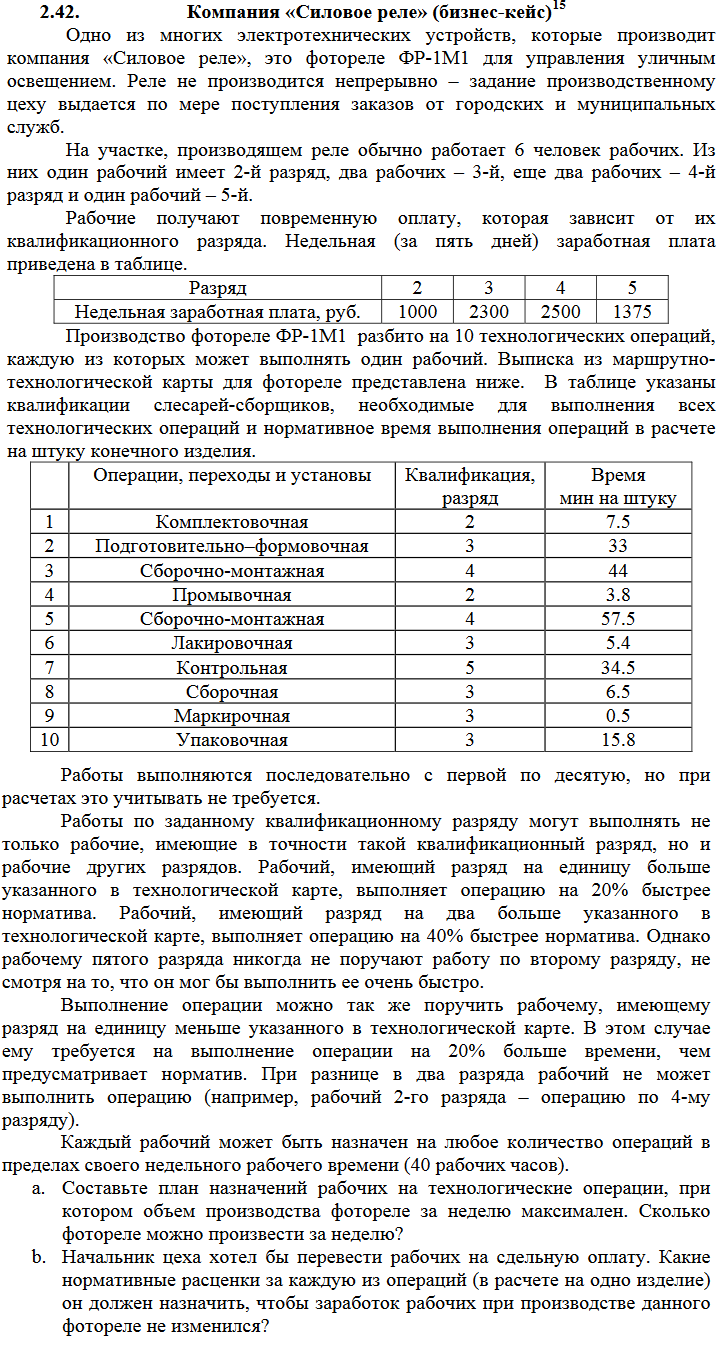

## Математическая модель

$$
t_{ij} - время \ которое \ тратит \ i-й \ работник  \ на \ j-ю \ операцию.
$$

$$
x_{ij} - число \ j-х \ операций, \ которое \ должен \ выполнить \ i-й \ работник \ в \ неделю.
$$

За исключением:

$$
  i = 0\ и\ j = 2;
$$

$$
  i = 0\ и\ j = 4;
$$

$$
  i = 0\ и\ j = 6;
$$

$$
  i = 1\ и\ j = 6;
$$

$$
  i = 2\ и\ j = 6;
$$

$$
  i = 5\ и\ j = 0;
$$

$$
  i = 5\ и\ j = 3.
$$


Т.к. данные работники не могут выполнять эти операции согласно условию
задачи.

* План назначений.

$$
2400 - число \ рабочих \ минут \ в \ неделю.
$$

Ограничения:

$$
1) \ Время, потраченное \ на \ выполнение \ j-й \ операций \ i-м \ рабочим \ ограничено \ недельным \ рабочим \ временем.
$$

$$
\sum_{i = 0}^{5}{\sum_{j = 0}^{9}{x_{ij}*t_{ij} \leq 2400}}.
$$

$$
2) \ Число \ выполненных \ операций \ должно \ быть \ равно \ числу \ выпущенных \ реле \ для \ каждой \ операции.
$$

$$
\sum_{i = 0}^{5}x_{ij} = \left( \frac{\sum_{i = 0}^{5}{\sum_{j = 0}^{9}x_{ij}}}{10} \right).
$$

Целевая функция:

$$
\left( \frac{\sum_{i = 0}^{5}{\sum_{j = 0}^{9}x_{ij}}}{10} \right) \rightarrow max.
$$

* Получение нормативных расценок.

$$
s_{i} - зарплата \ i-го \ рабочего \ в \ зависимости \ от \ разряда.
$$

$$
w_{i} = \frac{s_{i}}{2400} - сколько \ стоит \ одна \ минута \ работы
\ рабочего \ при \ выполнении \ каждой \ операции.
$$

$$
{s_{ij} = t}_{ij}*w_{i} - деньги, \ которые \ получает \ i-й \
работник \ за \ выполнение \ j-й \ операции.
$$


## Решение

In [ ]:
from pulp import *

# Создаем ЗЛП
prob = LpProblem("Кelay Problem", LpMaximize)

# Объявляем переменные
# Первый работник(2-го разряда)
x00 = LpVariable("First employee and first operation", lowBound=0, cat='Integer')
x01 = LpVariable("First employee and second operation", lowBound=0, cat='Integer')
x03 = LpVariable("First employee and fourth operation", lowBound=0, cat='Integer')
x05 = LpVariable("First employee and sixth operation", lowBound=0, cat='Integer')
x07 = LpVariable("First employee and eighth operation", lowBound=0, cat='Integer')
x08 = LpVariable("First employee and ninth operation", lowBound=0, cat='Integer')
x09 = LpVariable("First employee and tenth operation", lowBound=0, cat='Integer')  

# Второй работник(3-го разряда)
x10 = LpVariable("Second employee and first operation", lowBound=0, cat='Integer')
x11 = LpVariable("Second employee and second operation", lowBound=0, cat='Integer')
x12 = LpVariable("Second employee and third operation", lowBound=0, cat='Integer')
x13 = LpVariable("Second employee and fourth operation", lowBound=0, cat='Integer')
x14 = LpVariable("Second employee and fifth operation", lowBound=0, cat='Integer')
x15 = LpVariable("Second employee and sixth operation", lowBound=0, cat='Integer')
x17 = LpVariable("Second employee and eighth operation", lowBound=0, cat='Integer')
x18 = LpVariable("Second employee and ninth operation", lowBound=0, cat='Integer')
x19 = LpVariable("Second employee and tenth operation", lowBound=0, cat='Integer')

# Третий работник(3-го разряда)
x20 = LpVariable("Third employee and first operation", lowBound=0, cat='Integer')
x21 = LpVariable("Third employee and second operation", lowBound=0, cat='Integer')
x22 = LpVariable("Third employee and third operation", lowBound=0, cat='Integer')
x23 = LpVariable("Third employee and fourth operation", lowBound=0, cat='Integer')
x24 = LpVariable("Third employee and fifth operation", lowBound=0, cat='Integer')
x25 = LpVariable("Third employee and sixth operation", lowBound=0, cat='Integer')
x27 = LpVariable("Third employee and eighth operation", lowBound=0, cat='Integer')
x28 = LpVariable("Third employee and ninth operation", lowBound=0, cat='Integer')
x29 = LpVariable("Third employee and tenth operation", lowBound=0, cat='Integer')

# Четвертый работник(4-го разряда)
x30 = LpVariable("Fourth employee and first operation", lowBound=0, cat='Integer')
x31 = LpVariable("Fourth employee and second operation", lowBound=0, cat='Integer')
x32 = LpVariable("Fourth employee and third operation", lowBound=0, cat='Integer')
x33 = LpVariable("Fourth employee and fourth operation", lowBound=0, cat='Integer')
x34 = LpVariable("Fourth employee and fifth operation", lowBound=0, cat='Integer')
x35 = LpVariable("Fourth employee and sixth operation", lowBound=0, cat='Integer')
x36 = LpVariable("Fourth employee and seventh operation", lowBound=0, cat='Integer')
x37 = LpVariable("Fourth employee and eighth operation", lowBound=0, cat='Integer')
x38 = LpVariable("Fourth employee and ninth operation", lowBound=0, cat='Integer')
x39 = LpVariable("Fourth employee and tenth operation", lowBound=0, cat='Integer') 

# Пятый работник(4-го разряда)
x40 = LpVariable("Fifth employee and first operation", lowBound=0, cat='Integer')
x41 = LpVariable("Fifth employee and second operation", lowBound=0, cat='Integer')
x42 = LpVariable("Fifth employee and third operation", lowBound=0, cat='Integer')
x43 = LpVariable("Fifth employee and fourth operation", lowBound=0, cat='Integer')
x44 = LpVariable("Fifth employee and fifth operation", lowBound=0, cat='Integer')
x45 = LpVariable("Fifth employee and sixth operation", lowBound=0, cat='Integer')
x46 = LpVariable("Fifth employee and seventh operation", lowBound=0, cat='Integer')
x47 = LpVariable("Fifth employee and eighth operation", lowBound=0, cat='Integer')
x48 = LpVariable("Fifth employee and ninth operation", lowBound=0, cat='Integer')
x49 = LpVariable("Fifth employee and tenth operation", lowBound=0, cat='Integer')

# Шестой работник(4-го разряда)
x51 = LpVariable("Sixth employee and second operation", lowBound=0, cat='Integer')
x52 = LpVariable("Sixth employee and third operation", lowBound=0, cat='Integer')
x54 = LpVariable("Sixth employee and fifth operation", lowBound=0, cat='Integer')
x55 = LpVariable("Sixth employee and sixth operation", lowBound=0, cat='Integer')
x56 = LpVariable("Sixth employee and seventh operation", lowBound=0, cat='Integer')
x57 = LpVariable("Sixth employee and eighth operation", lowBound=0, cat='Integer')
x58 = LpVariable("Sixth employee and ninth operation", lowBound=0, cat='Integer')
x59 = LpVariable("Sixth employee and tenth operation", lowBound=0, cat='Integer')

# Объявляем целевую функцию
prob += ((x00+x10+x20+x30+x40) + (x01+x11+x21+x31+x41+x51) + (x12+x22+x32+x42+x52) + (x03+x13+x23+x33+x43) + (x14+x24+x34+x44+x54) + (x05+x15+x25+x35+x45+x55) + (x36+x46+x56) + (x07+x17+x27+x37+x47+x57) + x08+x18+x28+x38+x48+x58 + x09+x19+x29+x39+x49+x59) /10, "Number of Кelay"

# Вводим ограничения
prob += 7.5*x00 + 39.60*x01 + 3.80*x03 + 6.48*x05 + 7.8*x07 + 0.6*x08 + 18.96*x09 <= 2400, "Time first employee"
prob += 6.0*x10 + 33.0*x11 + 63.36*x12 + 3.04*x13 + 82.80*x14 + 5.4*x15 + 6.5*x17 + 0.5*x18 + 15.8*x19 <= 2400, "Time second employee"
prob += 4.8*x20 + 33.0*x21 + 52.8*x22 + 2.43*x23 + 69.00*x24 + 5.4*x25 + 6.5*x27 + 0.5*x28 + 15.8*x29 <= 2400, "Time third employee"
prob += 3.84*x30 + 26.4*x31 + 44.0*x32 + 1.95*x33 + 57.50*x34 + 4.32*x35 + 49.68*x36  + 5.2*x37 + 0.4*x38 + 12.64*x39 <= 2400, "Time fourth employee"
prob += 3.07*x40 + 21.12*x41 + 44.0*x42 + 1.56*x43 + 57.50*x44 + 3.46*x45 + 41.40*x46  + 4.16*x47 + 0.32*x48 + 10.11*x49 <= 2400, "Time fifth employee"
prob += 16.9*x51 + 35.20*x52 + 46.0*x54 + 2.76*x55 + 34.50*x56  + 3.33*x57 + 0.26*x58 + 8.09*x59 <= 2400, "Time sixth employee"

prob += x00+x10+x20+x30+x40 == ((x00+x10+x20+x30+x40) + (x01+x11+x21+x31+x41+x51) + (x12+x22+x32+x42+x52) + (x03+x13+x23+x33+x43) + (x14+x24+x34+x44+x54) + (x05+x15+x25+x35+x45+x55) + (x36+x46+x56) + (x07+x17+x27+x37+x47+x57) + (x08+x18+x28+x38+x48+x58) + x09+x19+x29+x39+x49+x59) /10, "First operation"
prob += x01+x11+x21+x31+x41+x51 == ((x00+x10+x20+x30+x40) + (x01+x11+x21+x31+x41+x51) + (x12+x22+x32+x42+x52) + (x03+x13+x23+x33+x43) + (x14+x24+x34+x44+x54) + (x05+x15+x25+x35+x45+x55) + (x36+x46+x56) + (x07+x17+x27+x37+x47+x57) + x08+x18+x28+x38+x48+x58 + x09+x19+x29+x39+x49+x59) /10, "Second operation"
prob += x12+x22+x32+x42+x52 == ((x00+x10+x20+x30+x40) + (x01+x11+x21+x31+x41+x51) + (x12+x22+x32+x42+x52) + (x03+x13+x23+x33+x43) + (x14+x24+x34+x44+x54) + (x05+x15+x25+x35+x45+x55) + (x36+x46+x56) + (x07+x17+x27+x37+x47+x57) + x08+x18+x28+x38+x48+x58 + x09+x19+x29+x39+x49+x59) /10, "Third operation"
prob += x03+x13+x23+x33+x43 == ((x00+x10+x20+x30+x40) + (x01+x11+x21+x31+x41+x51) + (x12+x22+x32+x42+x52) + (x03+x13+x23+x33+x43) + (x14+x24+x34+x44+x54) + (x05+x15+x25+x35+x45+x55) + (x36+x46+x56) + (x07+x17+x27+x37+x47+x57) + x08+x18+x28+x38+x48+x58 + x09+x19+x29+x39+x49+x59) /10, "Fourth operation"
prob += x14+x24+x34+x44+x54 == ((x00+x10+x20+x30+x40) + (x01+x11+x21+x31+x41+x51) + (x12+x22+x32+x42+x52) + (x03+x13+x23+x33+x43) + (x14+x24+x34+x44+x54) + (x05+x15+x25+x35+x45+x55) + (x36+x46+x56) + (x07+x17+x27+x37+x47+x57) + x08+x18+x28+x38+x48+x58 + x09+x19+x29+x39+x49+x59) /10, "Fifth operation"
prob += x05+x15+x25+x35+x45+x55 == ((x00+x10+x20+x30+x40) + (x01+x11+x21+x31+x41+x51) + (x12+x22+x32+x42+x52) + (x03+x13+x23+x33+x43) + (x14+x24+x34+x44+x54) + (x05+x15+x25+x35+x45+x55) + (x36+x46+x56) + (x07+x17+x27+x37+x47+x57) + x08+x18+x28+x38+x48+x58 + x09+x19+x29+x39+x49+x59) /10, "Sixth operation"
prob += x36+x46+x56 == ((x00+x10+x20+x30+x40) + (x01+x11+x21+x31+x41+x51) + (x12+x22+x32+x42+x52) + (x03+x13+x23+x33+x43) + (x14+x24+x34+x44+x54) + (x05+x15+x25+x35+x45+x55) + (x36+x46+x56) + (x07+x17+x27+x37+x47+x57) + x08+x18+x28+x38+x48+x58 + x09+x19+x29+x39+x49+x59) /10, "Seventh operation"
prob += x07+x17+x27+x37+x47+x57 == ((x00+x10+x20+x30+x40) + (x01+x11+x21+x31+x41+x51) + (x12+x22+x32+x42+x52) + (x03+x13+x23+x33+x43) + (x14+x24+x34+x44+x54) + (x05+x15+x25+x35+x45+x55) + (x36+x46+x56) + (x07+x17+x27+x37+x47+x57) + (x08+x18+x28+x38+x48+x58) + (x09+x19+x29+x39+x49+x59)) /10, "Eighth operation"
prob += x08+x18+x28+x38+x48+x58 == ((x00+x10+x20+x30+x40) + (x01+x11+x21+x31+x41+x51) + (x12+x22+x32+x42+x52) + (x03+x13+x23+x33+x43) + (x14+x24+x34+x44+x54) + (x05+x15+x25+x35+x45+x55) + (x36+x46+x56) + (x07+x17+x27+x37+x47+x57) + (x08+x18+x28+x38+x48+x58) + (x09+x19+x29+x39+x49+x59)) /10, "Ninth operation"
prob += x09+x19+x29+x39+x49+x59 == ((x00+x10+x20+x30+x40) + (x01+x11+x21+x31+x41+x51) + (x12+x22+x32+x42+x52) + (x03+x13+x23+x33+x43) + (x14+x24+x34+x44+x54) + (x05+x15+x25+x35+x45+x55) + (x36+x46+x56) + (x07+x17+x27+x37+x47+x57) + (x08+x18+x28+x38+x48+x58) + (x09+x19+x29+x39+x49+x59)) /10, "Tenth  operation"

prob

/usr/local/lib/python3.9/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Кelay_Problem:
MAXIMIZE
0.1*Fifth_employee_and_eighth_operation + 0.1*Fifth_employee_and_fifth_operation + 0.1*Fifth_employee_and_first_operation + 0.1*Fifth_employee_and_fourth_operation + 0.1*Fifth_employee_and_ninth_operation + 0.1*Fifth_employee_and_second_operation + 0.1*Fifth_employee_and_seventh_operation + 0.1*Fifth_employee_and_sixth_operation + 0.1*Fifth_employee_and_tenth_operation + 0.1*Fifth_employee_and_third_operation + 0.1*First_employee_and_eighth_operation + 0.1*First_employee_and_first_operation + 0.1*First_employee_and_fourth_operation + 0.1*First_employee_and_ninth_operation + 0.1*First_employee_and_second_operation + 0.1*First_employee_and_sixth_operation + 0.1*First_employee_and_tenth_operation + 0.1*Fourth_employee_and_eighth_operation + 0.1*Fourth_employee_and_fifth_operation + 0.1*Fourth_employee_and_first_operation + 0.1*Fourth_employee_and_fourth_operation + 0.1*Fourth_employee_and_ninth_operation + 0.1*Fourth_employee_and_second_operation + 0.1*Fourth_emplo

### Получаем значение целевой функции

In [ ]:
prob.solve()

print(int(value(prob.objective)))

68


### Смотрим какие операции должен выполнить каждый работник в неделю

In [41]:
import pandas as pd 
import numpy as np

data = {'': ['First employee', 'Second employee', 'Third employee', 'Fourth employee', 'Fifth employee', 'Sixth employee'],
        
        'First operation':[int(x00.varValue), int(x10.varValue), int(x20.varValue), int(x30.varValue), int(x40.varValue), np.nan], 
        'Second operation':[int(x01.varValue), int(x11.varValue), int(x21.varValue), int(x31.varValue), int(x41.varValue), int(x51.varValue)],
        'Third operation':[None, int(x12.varValue), int(x22.varValue), int(x32.varValue), int(x42.varValue), int(x52.varValue)],
        'Fourth operation':[int(x03.varValue), int(x13.varValue), int(x23.varValue), int(x33.varValue), int(x43.varValue), None],
        'Fifth operation':[None, int(x14.varValue), int(x24.varValue), int(x34.varValue), int(x44.varValue), int(x54.varValue)],
        'Sixth operation':[int(x05.varValue), int(x15.varValue), int(x25.varValue), int(x35.varValue), int(x45.varValue), int(x55.varValue)],
        'Seventh operation':[None, None, None, int(x36.varValue), int(x46.varValue), int(x56.varValue)],
        'Eighth operation':[int(x07.varValue), int(x17.varValue), int(x27.varValue), int(x37.varValue), int(x47.varValue), int(x57.varValue)],
        'Ninth operation':[int(x08.varValue), int(x18.varValue), int(x28.varValue), int(x38.varValue), int(x48.varValue), int(x58.varValue)],
        'Tenth operation':[int(x09.varValue), int(x19.varValue), int(x29.varValue), int(x39.varValue), int(x49.varValue), int(x59.varValue)]
        }
 
 
df_operations = pd.DataFrame(data)
df_operations

,,First operation,Second operation,Third operation,Fourth operation,Fifth operation,Sixth operation,Seventh operation,Eighth operation,Ninth operation,Tenth operation
0,First employee,0.0,46,NaN,0.0,NaN,0,NaN,60,68,3
1,Second employee,0.0,0,37.0,0.0,0.0,0,NaN,8,0,0
2,Third employee,0.0,0,1.0,0.0,34.0,0,NaN,0,0,0
3,Fourth employee,0.0,0,10.0,0.0,34.0,0,0.0,0,0,0
4,Fifth employee,68.0,0,0.0,68.0,0.0,1,50.0,0,0,1
5,Sixth employee,NaN,22,20.0,NaN,0.0,67,18.0,0,0,64


### Конвертируем все значения в таблице в int

In [42]:
df_operations['First operation'] = df_operations['First operation'].astype('Int64')
df_operations['Third operation'] = df_operations['Third operation'].astype('Int64')
df_operations['Fourth operation'] = df_operations['Fourth operation'].astype('Int64')
df_operations['Fifth operation'] = df_operations['Fifth operation'].astype('Int64')
df_operations['Seventh operation'] = df_operations['Seventh operation'].astype('Int64')
#df=df.style.hide(axis='index')
df_operations

,,First operation,Second operation,Third operation,Fourth operation,Fifth operation,Sixth operation,Seventh operation,Eighth operation,Ninth operation,Tenth operation
0,First employee,0,46,<NA>,0,<NA>,0,<NA>,60,68,3
1,Second employee,0,0,37,0,0,0,<NA>,8,0,0
2,Third employee,0,0,1,0,34,0,<NA>,0,0,0
3,Fourth employee,0,0,10,0,34,0,0,0,0,0
4,Fifth employee,68,0,0,68,0,1,50,0,0,1
5,Sixth employee,<NA>,22,20,<NA>,0,67,18,0,0,64


In [43]:
df_operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0                      6 non-null      object
 1   First operation    5 non-null      Int64 
 2   Second operation   6 non-null      int64 
 3   Third operation    5 non-null      Int64 
 4   Fourth operation   5 non-null      Int64 
 5   Fifth operation    5 non-null      Int64 
 6   Sixth operation    6 non-null      int64 
 7   Seventh operation  3 non-null      Int64 
 8   Eighth operation   6 non-null      int64 
 9   Ninth operation    6 non-null      int64 
 10  Tenth operation    6 non-null      int64 
dtypes: Int64(5), int64(5), object(1)
memory usage: 686.0+ bytes


### Конвертируем Nan в нули.

In [44]:
df_operations['First operation'] = df_operations['First operation'].fillna(0)
df_operations['Third operation'] = df_operations['Third operation'].fillna(0)
df_operations['Fourth operation'] = df_operations['Fourth operation'].fillna(0)
df_operations['Fifth operation'] = df_operations['Fifth operation'].fillna(0)
df_operations['Seventh operation'] = df_operations['Seventh operation'].fillna(0)
df_operations

,,First operation,Second operation,Third operation,Fourth operation,Fifth operation,Sixth operation,Seventh operation,Eighth operation,Ninth operation,Tenth operation
0,First employee,0,46,0,0,0,0,0,60,68,3
1,Second employee,0,0,37,0,0,0,0,8,0,0
2,Third employee,0,0,1,0,34,0,0,0,0,0
3,Fourth employee,0,0,10,0,34,0,0,0,0,0
4,Fifth employee,68,0,0,68,0,1,50,0,0,1
5,Sixth employee,0,22,20,0,0,67,18,0,0,64


In [45]:
df_operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0                      6 non-null      object
 1   First operation    6 non-null      Int64 
 2   Second operation   6 non-null      int64 
 3   Third operation    6 non-null      Int64 
 4   Fourth operation   6 non-null      Int64 
 5   Fifth operation    6 non-null      Int64 
 6   Sixth operation    6 non-null      int64 
 7   Seventh operation  6 non-null      Int64 
 8   Eighth operation   6 non-null      int64 
 9   Ninth operation    6 non-null      int64 
 10  Tenth operation    6 non-null      int64 
dtypes: Int64(5), int64(5), object(1)
memory usage: 686.0+ bytes


## Находим нормативные расценки

### Найдем сколько денег получит каждый работник за выполнение каждой операции

Находим цену одной минуты при максимальном количестве реле произведенных в неделю

In [46]:
salary = [1000, 1150, 1150, 1250, 1250, 1375]

In [47]:
time = 2400

minute_price = [x/time for x in salary]
 
minute_price

[0.4166666666666667,
 0.4791666666666667,
 0.4791666666666667,
 0.5208333333333334,
 0.5208333333333334,
 0.5729166666666666]

In [67]:
# В операциях, которые не могут выполнять рабочие ставим нули для удобства рассчетов

data = {'': ['First employee', 'Second employee', 'Third employee', 'Fourth employee', 'Fifth employee', 'Sixth employee'],
        
        'First operation':[7.5, 6.00, 4.8, 3.84, 3.07, 0], 
        'Second operation':[39.60, 33.00, 33.00, 26.40, 21.12, 16.90],
        'Third operation':[0, 63.36, 52.80, 44.00, 44.00, 35.20],
        'Fourth operation':[3.80, 3.04, 2.43, 1.95, 1.56, 0],
        'Fifth operation':[0, 82.80, 69.00, 57.50, 57.50, 46.00],
        'Sixth operation':[6.48, 5.40, 5.40, 4.32, 3.46, 2.76],
        'Seventh operation':[0, 0, 0, 49.68, 41.40, 34.50],
        'Eighth operation':[7.80, 6.50, 6.50, 5.20, 4.16, 3.33],
        'Ninth operation':[0.60, 0.50, 0.50, 0.40, 0.32, 0.26],
        'Tenth operation':[18.96, 15.80, 15.80, 12.64, 10.11, 8.09]
        }

df_times = pd.DataFrame(data)
df_times

,,First operation,Second operation,Third operation,Fourth operation,Fifth operation,Sixth operation,Seventh operation,Eighth operation,Ninth operation,Tenth operation
0,First employee,7.50,39.60,0.00,3.80,0.0,6.48,0.00,7.80,0.60,18.96
1,Second employee,6.00,33.00,63.36,3.04,82.8,5.40,0.00,6.50,0.50,15.80
2,Third employee,4.80,33.00,52.80,2.43,69.0,5.40,0.00,6.50,0.50,15.80
3,Fourth employee,3.84,26.40,44.00,1.95,57.5,4.32,49.68,5.20,0.40,12.64
4,Fifth employee,3.07,21.12,44.00,1.56,57.5,3.46,41.40,4.16,0.32,10.11
5,Sixth employee,0.00,16.90,35.20,0.00,46.0,2.76,34.50,3.33,0.26,8.09


In [68]:
df_times_t = df_times.T # поворачиваем dataframe на 90 градусов
df_times_t = df_times_t.iloc [1: , :] # удаляем первую строку
df_times_t

,0,1,2,3,4,5
First operation,7.5,6.0,4.8,3.84,3.07,0.0
Second operation,39.6,33.0,33.0,26.4,21.12,16.9
Third operation,0.0,63.36,52.8,44.0,44.0,35.2
Fourth operation,3.8,3.04,2.43,1.95,1.56,0.0
Fifth operation,0.0,82.8,69.0,57.5,57.5,46.0
Sixth operation,6.48,5.4,5.4,4.32,3.46,2.76
Seventh operation,0.0,0.0,0.0,49.68,41.4,34.5
Eighth operation,7.8,6.5,6.5,5.2,4.16,3.33
Ninth operation,0.6,0.5,0.5,0.4,0.32,0.26
Tenth operation,18.96,15.8,15.8,12.64,10.11,8.09


In [69]:
list_times = df_times_t.values.T.tolist()
list_times

[[7.5, 39.6, 0.0, 3.8, 0.0, 6.48, 0.0, 7.8, 0.6, 18.96],
 [6.0, 33.0, 63.36, 3.04, 82.8, 5.4, 0.0, 6.5, 0.5, 15.8],
 [4.8, 33.0, 52.8, 2.43, 69.0, 5.4, 0.0, 6.5, 0.5, 15.8],
 [3.84, 26.4, 44.0, 1.95, 57.5, 4.32, 49.68, 5.2, 0.4, 12.64],
 [3.07, 21.12, 44.0, 1.56, 57.5, 3.46, 41.4, 4.16, 0.32, 10.11],
 [0.0, 16.9, 35.2, 0.0, 46.0, 2.76, 34.5, 3.33, 0.26, 8.09]]

In [70]:
first_employee = [x*float(minute_price[0]) for x in list_times[0]]
second_employee = [x*float(minute_price[1]) for x in list_times[1]]
third_employee = [x*float(minute_price[2]) for x in list_times[2]]
fourth_employee = [x*float(minute_price[3]) for x in list_times[3]]
fifth_employee = [x*float(minute_price[4]) for x in list_times[4]]
sixth_employee = [x*float(minute_price[5]) for x in list_times[5]]
 
first_employee

[3.125, 16.5, 0.0, 1.5833333333333333, 0.0, 2.7, 0.0, 3.25, 0.25, 7.9]

In [71]:
df_cost_oper = pd.DataFrame([first_employee, second_employee, third_employee, fourth_employee, fifth_employee, sixth_employee], 
             columns=['First operation', 'Second operation', 'Third operation', 'Fourth operation', 'Fifth operation', 'Sixth operation', 'Seventh operation','Eighth operation', 'Ninth operation', 'Tenth operation'])
df_cost_oper

,First operation,Second operation,Third operation,Fourth operation,Fifth operation,Sixth operation,Seventh operation,Eighth operation,Ninth operation,Tenth operation
0,3.125000,16.500000,0.000000,1.583333,0.000000,2.700000,0.000000,3.250000,0.250000,7.900000
1,2.875000,15.812500,30.360000,1.456667,39.675000,2.587500,0.000000,3.114583,0.239583,7.570833
2,2.300000,15.812500,25.300000,1.164375,33.062500,2.587500,0.000000,3.114583,0.239583,7.570833
3,2.000000,13.750000,22.916667,1.015625,29.947917,2.250000,25.875000,2.708333,0.208333,6.583333
4,1.598958,11.000000,22.916667,0.812500,29.947917,1.802083,21.562500,2.166667,0.166667,5.265625
5,0.000000,9.682292,20.166667,0.000000,26.354167,1.581250,19.765625,1.907812,0.148958,4.634896


### Найдем сколько рублей в неделю получит каждый работник за выполнение операции согласно плану назначений

In [52]:
df_operations

,,First operation,Second operation,Third operation,Fourth operation,Fifth operation,Sixth operation,Seventh operation,Eighth operation,Ninth operation,Tenth operation
0,First employee,0,46,0,0,0,0,0,60,68,3
1,Second employee,0,0,37,0,0,0,0,8,0,0
2,Third employee,0,0,1,0,34,0,0,0,0,0
3,Fourth employee,0,0,10,0,34,0,0,0,0,0
4,Fifth employee,68,0,0,68,0,1,50,0,0,1
5,Sixth employee,0,22,20,0,0,67,18,0,0,64


In [53]:
df_operations = df_operations.drop('', axis=1)
df_operations

,First operation,Second operation,Third operation,Fourth operation,Fifth operation,Sixth operation,Seventh operation,Eighth operation,Ninth operation,Tenth operation
0,0,46,0,0,0,0,0,60,68,3
1,0,0,37,0,0,0,0,8,0,0
2,0,0,1,0,34,0,0,0,0,0
3,0,0,10,0,34,0,0,0,0,0
4,68,0,0,68,0,1,50,0,0,1
5,0,22,20,0,0,67,18,0,0,64


In [ ]:
df_salary = pd.DataFrame(df_operations.values*df_cost_oper.values, columns=df_operations.columns, index=df_operations.index)
df_salary

,First operation,Second operation,Third operation,Fourth operation,Fifth operation,Sixth operation,Seventh operation,Eighth operation,Ninth operation,Tenth operation
0,0.0,759.0,0.0,0.0,0.0,0.0,0.0,195.0,17.0,23.7
1,0.0,0.0,1123.32,0.0,0.0,0.0,0.0,24.916667,0.0,0.0
2,0.0,0.0,25.3,0.0,1124.125,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,229.166667,0.0,1018.229167,0.0,0.0,0.0,0.0,0.0
4,108.729167,0.0,0.0,55.25,0.0,1.802083,1078.125,0.0,0.0,5.265625
5,0.0,213.010417,403.333333,0.0,0.0,105.94375,355.78125,0.0,0.0,296.633333


### Полученная зарплата работников

In [ ]:
df_salary = df_salary.sum(axis = 1)
df_salary

0     994.700000
1    1148.236667
2    1149.425000
3    1247.395833
4    1249.171875
5    1374.702083
dtype: float64

In [ ]:
type(df_salary)

pandas.core.series.Series

In [ ]:
df_salary= df_salary.to_frame()
df_salary

,0
0,994.700000
1,1148.236667
2,1149.425000
3,1247.395833
4,1249.171875
5,1374.702083


In [ ]:
type(df_salary)

pandas.core.frame.DataFrame

In [ ]:
wokers = ['First employee', 'Second employee', 'Third employee', 'Fourth employee', 'Fifth employee', 'Sixth employee']

df_salary.insert(loc = 0,
          column = 'Wokers',
          value = wokers)
headers =  ["Wokers", "Salary"]

df_salary.columns = headers
df_salary=df_salary.style.hide(axis='index')
df_salary

Wokers,Salary
First employee,994.700000
Second employee,1148.236667
Third employee,1149.425000
Fourth employee,1247.395833
Fifth employee,1249.171875
Sixth employee,1374.702083
